In [1]:
# Importar Bibliotecas necesarias

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree



In [2]:
#cargo los datos
df = pd.read_csv ("covid.csv", engine='python',index_col=0)
df.head(10)


,country,new_cases,new_deaths,total_cases,total_deaths
date,,,,,
2019-12-31,Afghanistan,0,0,0,0
2020-01-01,Afghanistan,0,0,0,0
2020-01-02,Afghanistan,0,0,0,0
2020-01-03,Afghanistan,0,0,0,0
2020-01-04,Afghanistan,0,0,0,0
2020-01-05,Afghanistan,0,0,0,0
2020-01-06,Afghanistan,0,0,0,0
2020-01-07,Afghanistan,0,0,0,0
2020-01-08,Afghanistan,0,0,0,0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7320 entries, 2019-12-31 to 2020-03-28
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       7320 non-null   object
 1   new_cases     7320 non-null   int64 
 2   new_deaths    7320 non-null   int64 
 3   total_cases   7320 non-null   int64 
 4   total_deaths  7320 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 343.1+ KB


In [4]:
# Eliminar filas donde hallan valores faltantes
df.dropna(inplace=True)

In [5]:
# variables predictoras
X = df.iloc[:, :-1]
X.head()


,country,new_cases,new_deaths,total_cases
date,,,,
2019-12-31,Afghanistan,0,0,0
2020-01-01,Afghanistan,0,0,0
2020-01-02,Afghanistan,0,0,0
2020-01-03,Afghanistan,0,0,0
2020-01-04,Afghanistan,0,0,0


In [6]:
# variable a predecir
y = df.iloc[:, -1]
y.head()

date
2019-12-31    0
2020-01-01    0
2020-01-02    0
2020-01-03    0
2020-01-04    0
Name: total_deaths, dtype: int64

In [7]:
# Convierto variables categorias en variables numericas
X = pd.get_dummies(X)
y = pd.get_dummies(y)



In [8]:
#Se divide el conjunto de datos en conjuntos de entrenamiento y prueba
#  X_train, y_train para entrenamiento
#  X_test, y_test pra predecir
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=0)


In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1830 entries, 2020-02-26 to 2020-03-24
Columns: 199 entries, new_cases to country_Zimbabwe
dtypes: int64(3), uint8(196)
memory usage: 407.5+ KB


In [10]:
#Se crea un modelo de arbol de decision y entrenarlo con el conjunto de datos de entranamiento

#Llamo al construtor del arbol de decisión
arbol = DecisionTreeClassifier(max_depth=1)

#Entrono al modelo
arbol.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=1)

In [11]:
# Evaluo el modelo con el conjunto de datos de Prueba
score = arbol.score(X_test, y_test)
print("Accuracy: %.2f%%" % (score *100.0))

Accuracy: 80.16%


In [12]:
# procede a graficar el arbol para lo que agrego la dimensiones del grafico
fig = plt.figure(figsize=(25,20))

<Figure size 1800x1440 with 0 Axes>

In [14]:
score=arbol.score(X_train,y_train)
print(score)

0.8180327868852459


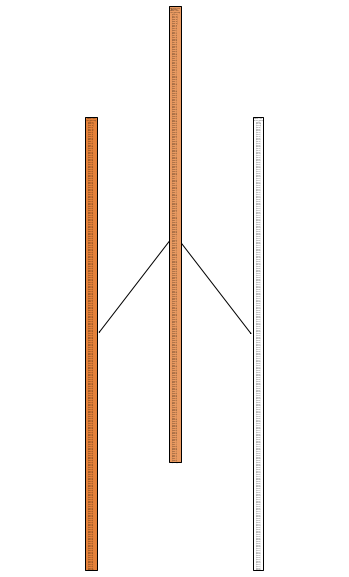

In [16]:
#port_graphviz(Arbol,out_file='arbol.dot',class_names=iris.target_names,feature_names=iris.feature_names,filled=True)

tree.plot_tree(arbol, feature_names=list(X.columns.values), class_names=list(y.values),filled=True)
plt.show()